In [2]:
import pandas as pd
from aux_msa_functions import *
import time
from scipy.spatial.distance import cdist
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

In [38]:
# "data/msa-{msa_type}-simulations/MSA-1b/static-context/{context_size}/{fam}/{fam}-{sim_ind}.fasta"
# "data/msa-{msa_type}-simulations/MSA-1b/dynamic-context/{context_size}/{context_sampling}/{fam}/{fam}-{sim_ind}.fasta"

context_type = "dynamic"

msa_type = "seed"
context_size = 10
context_sampling = "random"
fam = "PF00004"
sim_ind = 9

diagnostics_folder = "./diagnostics/"

if context_type == "dynamic":
    diagnostics_folder += f"msa-{msa_type}-simulations/MSA-1b/dynamic-context/{context_size}/{context_sampling}/{fam}/{sim_ind}"
elif context_type == "static":
    diagnostics_folder += f"msa-{msa_type}-simulations/MSA-1b/static-context/{context_size}/{fam}/{sim_ind}"
    
mean_proposal_probs = np.load(os.path.join(diagnostics_folder,"mean_proposal_probs.npy"))
n_mutations = np.load(os.path.join(diagnostics_folder,"n_mutations.npy"))
hamming_distances = np.load(os.path.join(diagnostics_folder,"hamming_distances.npy"))
n_proposals = np.load(os.path.join(diagnostics_folder,"n_proposals.npy"))
mean_accepted_proposal_probs = np.load(os.path.join(diagnostics_folder,"mean_accepted_proposal_probs.npy"))

diagnostics_df = pd.DataFrame({"mean_proposal_probs":mean_proposal_probs, "n_mutations":n_mutations,
                               "n_proposals":n_proposals, "hamming_distances":hamming_distances, 
                               "mean_accepted_proposal_probs":mean_accepted_proposal_probs})

array([<Axes: title={'center': 'mean_accepted_proposal_probs'}>],
      dtype=object)

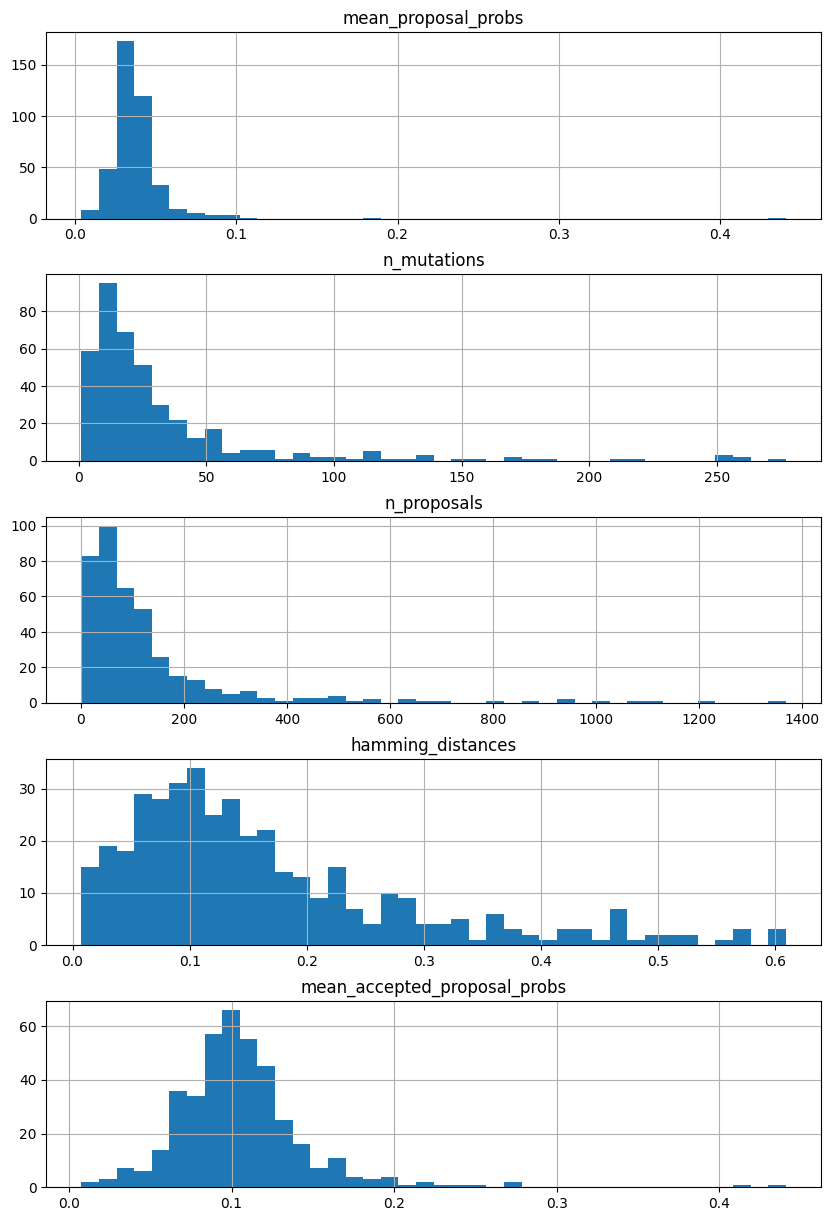

In [44]:
fig, axes = plt.subplots(nrows=5,ncols = 1, figsize = (10,15))

diagnostics_df.hist("mean_proposal_probs",bins = 40, ax = axes[0])
diagnostics_df.hist("n_mutations",bins = 40, ax = axes[1])
diagnostics_df.hist("n_proposals",bins = 40, ax = axes[2])
diagnostics_df.hist("hamming_distances", bins = 40, ax = axes[3])
diagnostics_df.hist("mean_accepted_proposal_probs", bins = 40, ax = axes[4])

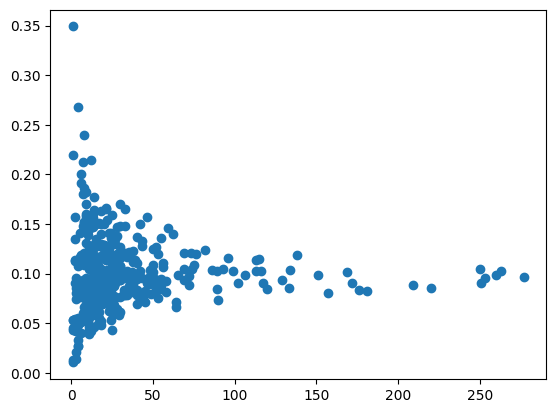

In [23]:
plt.scatter(diagnostics_df["n_mutations"], diagnostics_df["mean_accepted_proposal_probs"])

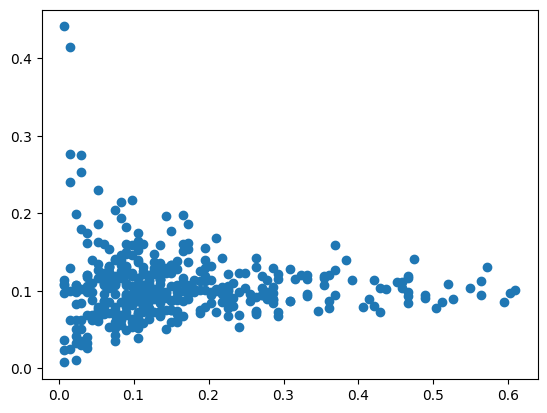

In [40]:
plt.scatter(diagnostics_df["hamming_distances"], diagnostics_df["mean_accepted_proposal_probs"])